# Introduction 

This Jupyter Notebook contains analysis of Top 50 Spotify Tracks 2020 dataset. Herein the notebook will provide and describe steps of data cleaning, exploratory data analysis, correlation calculations, some comparisons and finalise with giving improvements to be done.

In [84]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import itertools
import warnings
warnings.filterwarnings('ignore')

# Loading spotify data

In [85]:
# Importing the spotify data

df = pd.read_csv('./spotifytoptracks.csv', sep=',', index_col=0)
df.head(5)


,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


# Data cleaning

#### Check is any row NULL?



<p> In the below cell we are investigating if any value in the rows of features (any()) at a dataframe is null (isnull()). <br>
    In the output we expect a boolean value to be False if there are no null values for the columns, otherwise if there is at least one null value - True. <p>



In [86]:
df.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

#### Check if there are any duplicates?

<p> In the below cell we are checking if a row across all features in a dataframe contains duplicate values. <br>
In the output we expect a boolean value to be False if there are no duplicated rows. <p>


In [87]:
df.duplicated(df.columns)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

## Treating the outliers

<p> In the below sections (until EDA) we are treating the outliers. The dots in the graphs below show the outliers. <p>

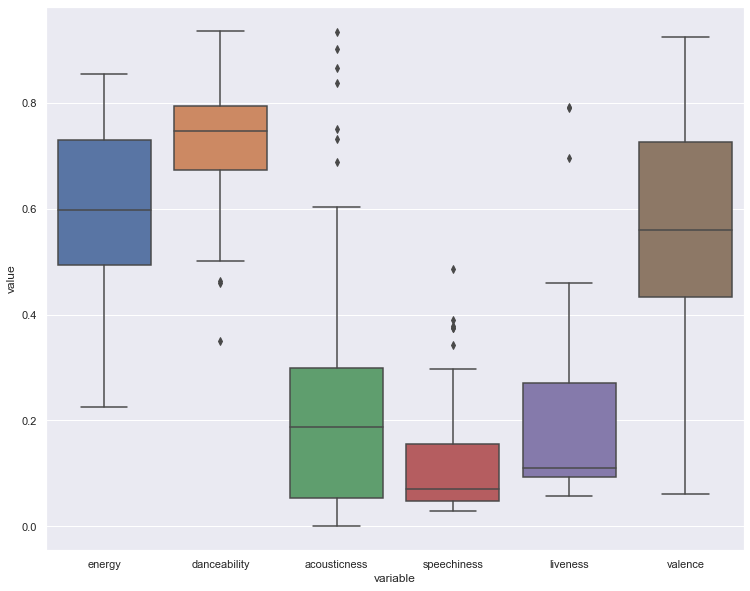

In [88]:
# Assigning a new dataframe (df_2) from a known dataframe (df) with 6 features ranging from 0 to 1
%matplotlib inline

df_2 = pd.DataFrame(data = df, columns = ['energy', 'danceability', 'acousticness',
                                          'speechiness', 'liveness', 'valence'])

# Setting the dimensions and overwriting the default values

sns.set(rc={'figure.figsize':(12.5,10.0)})

# Selecting boxplot for visualization 

sns.boxplot(x="variable", y="value", data=pd.melt(df_2))

# Plotting outliers within 6 features ranging from 0 to 1 

plt.show()

# Expected result: outlier identifications

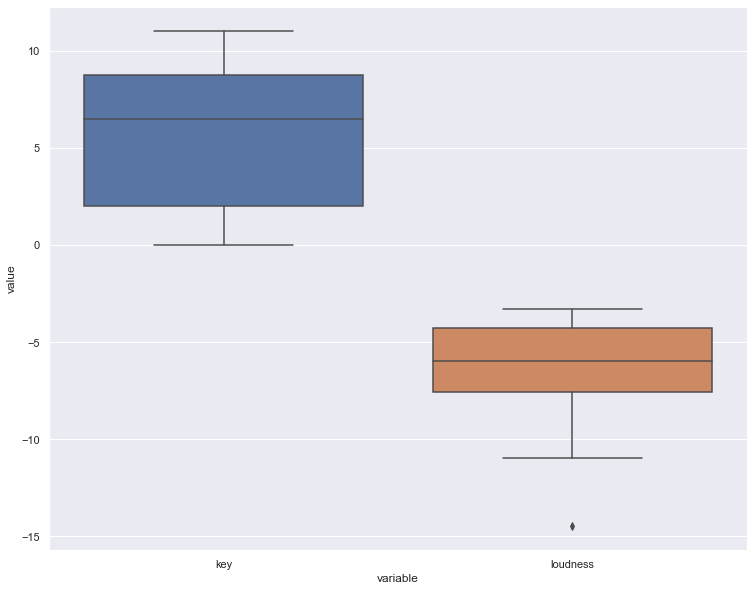

In [89]:
# Assigning a new dataframe (df_3) from a known dataframe (df) with 2 features ranging from -15 to ~10

df_3 = pd.DataFrame(data = df, columns = ['key','loudness'])

# Selecting boxplot for visualization 

sns.boxplot(x="variable", y="value", data=pd.melt(df_3))

# Plotting outliers within 2 features ranging from -15 to ~10 

plt.show()

# Expected result: outlier identifications

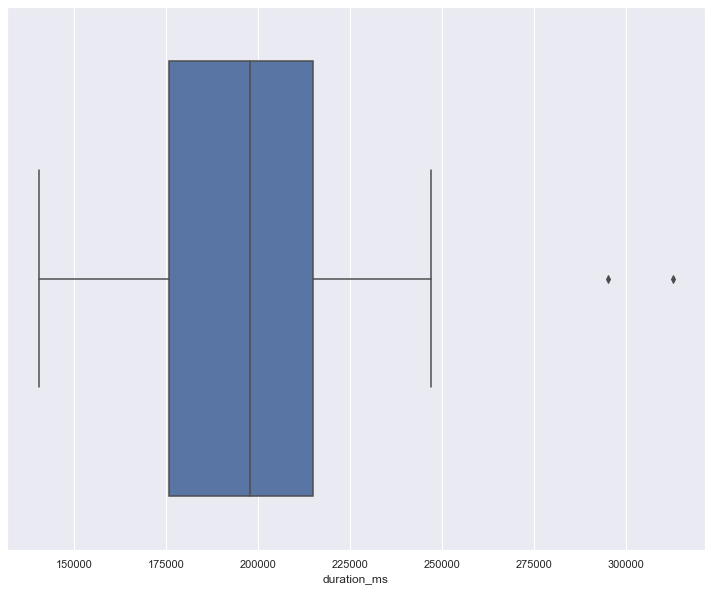

In [90]:
# Selecting boxplot for visualization of duration_ms column

_ = sns.boxplot(x=df['duration_ms'])

# Expected result: outlier identifications

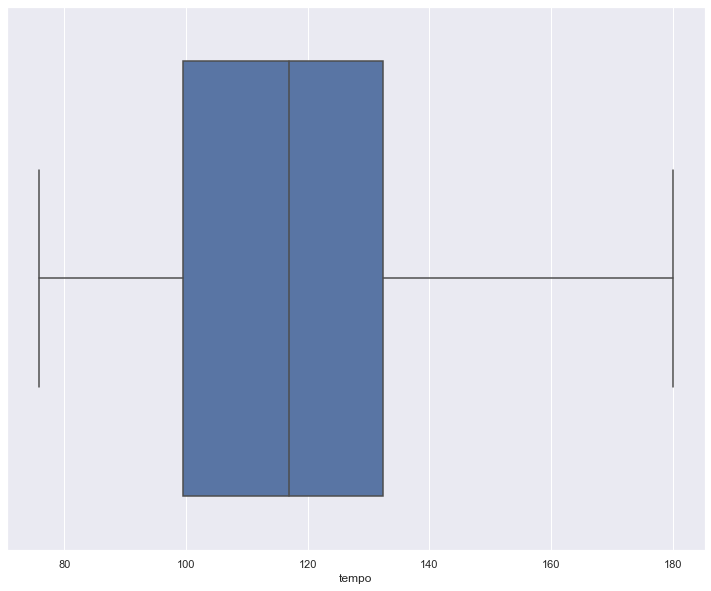

In [91]:
# Selecting boxplot for visualization of tempo column

_ = sns.boxplot(x=df['tempo'])
# _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

# Expected result: outlier identifications, but none identified

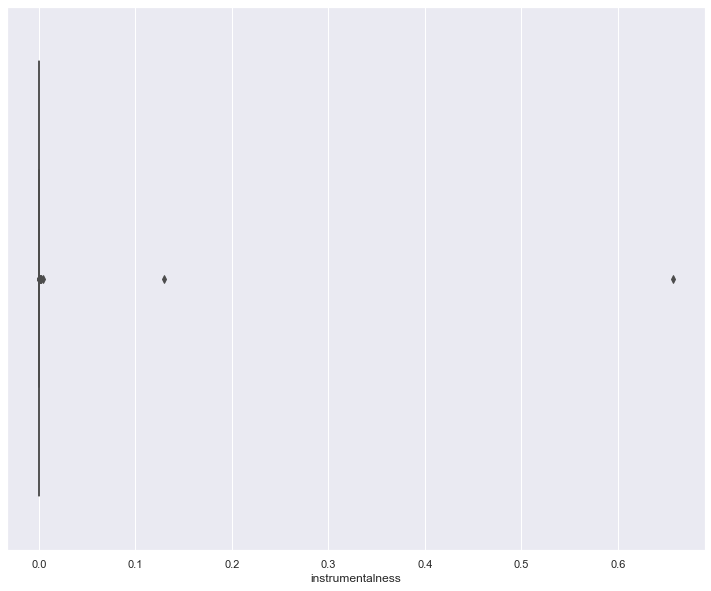

In [92]:
# Selecting boxplot for visualization of instrumentalness column

_ = sns.boxplot(x=df['instrumentalness'])
# _ = plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


# Expected result: outlier identifications

# Exploratory Data Analysis
### 1. Data exploration & popularity analysis

<p> In the cell below we are changing index values to start from 1 and change its column name to 'position' <p>
    

In [93]:
df.index += 1
df.index.name = 'position'
df.head(5)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
position,,,,,,,,,,,,,,,,
1,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
2,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
3,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
4,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
5,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


#### How many observations and features there are?

<p> In the below cell we are counting row numbers of index as observations and column numbers as features. <br>
    In the output we are displaying the number of rows (50) and columns (16). There are 50 observations and 16 features. <p>



In [94]:
print("Observations: " + str(len(df.index)))
print("Features: " + str(len(df.columns)))
# df.shape[0]

Observations: 50
Features: 16


#### Which of the features are numeric?

<p> In the cell below we are defining all columns and implementing function (_get_numeric_data()) to find numeric features. <br>
    In the output we are getting these numeric features: 'energy', 'danceability', 'key', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'. <p>



In [95]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

# df.info()

Index(['energy', 'danceability', 'key', 'loudness', 'acousticness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

#### Which features are categorical?

<p> In the cell below we are substracting numeric features from all columns. <br>
    In the output we get categorical features: 'album', 'genre', 'artist', 'track_name', 'track_id'. <p>



In [96]:
cat_cols = list(set(cols) - set(num_cols))
cat_cols

# df.dtypes.value_counts()

['album', 'track_id', 'genre', 'track_name', 'artist']

#### Are there any artists that have more than 1 popular track?

<p> In the cell below we are splitting dataframe into artist groups that have at least one track and sorting the values in descending order. <br>
    In the ouput we expect a boolean to be True, which signifies that there are artists with more than one popular track. <p>



In [97]:
all_artists = df.groupby('artist')['track_name'].count().sort_values(ascending=False)

# Gives a boolean value if a mask is true
(all_artists[1] > 1).any()

True

#### If yes, which and how many?

<p> In the cell below we are assigning a variable that checks over all_artists series object where mask is true. <br>
    In the output we get all artists that have more than 1 track. It gives 7 artists: Travis Scott, Billie Eilish, Dua Lipa, Harry Styles, Lewis Capaldi, Post Malone, Justin Bieber. <p>


In [98]:
popular_artists = all_artists[(all_artists > 1)]
popular_artists

artist
Travis Scott     3
Billie Eilish    3
Dua Lipa         3
Harry Styles     2
Lewis Capaldi    2
Post Malone      2
Justin Bieber    2
Name: track_name, dtype: int64

#### Who was the most popular artist?

<p> In the cell below we are assigning variables that implements max() function on popular_artists series object and checks over this series where mask is true. <br>
    In the output we get the most popular artists to be 3 with 3 meaning that there are 3 most popular artists: Travis Scott, Billie Eilish, Dua Lipa  <p>



In [99]:
max_songs_by_artist = popular_artists.max()
most_popular_artists = popular_artists[(popular_artists == max_songs_by_artist)]
most_popular_artists 

artist
Travis Scott     3
Billie Eilish    3
Dua Lipa         3
Name: track_name, dtype: int64

#### How many artists in total have their songs in the top 50?

<p> In the cell below we are counting over all rows of a column of an updated all_artists series. <br>
    The output gives 40, which means that there are 40 unique artists that have their songs in the top 50. <p>



In [100]:
all_artists[:].count()

# Alternative ways:
# all_artists.iloc[:].count()
# all_artists.count()

40

#### Are there any albums that have more than 1 popular track? 

<p> In the cell below we are splitting dataframe into album groups that have at least one track and sort the values in the descending order. <br>
    In the output we expect a boolean to be True, which signifies that there are albums with more than one popular track. <p>



In [101]:
albums_with_tracks = df.groupby('album')['track_name'].count().sort_values(ascending=False)

# Gives a boolean value if a mask is true
(albums_with_tracks[1] > 1).any()

True

####  If yes, which and how many?

<p> In the cell below we are assigning variables that implement min() function and check albums_with_tracks series object where mask is true. <br>
    The output gives albums that contain more than one track in albums_with_tracks series. Should be 4: Future Nostalgia, Hollywood's Bleeding, Changes, Fine Line. <p>



In [102]:
min_albums_with_songs = albums_with_tracks.min()
most_popular_albums = albums_with_tracks[(albums_with_tracks > min_albums_with_songs)]
most_popular_albums

album
Future Nostalgia        3
Hollywood's Bleeding    2
Changes                 2
Fine Line               2
Name: track_name, dtype: int64

#### How many albums in total have their songs in the top 50?

<p> In the cell below we are counting over all rows of a column of an albums_with_tracks series. <br>
The output gives 45, which means that there are 45 unique albums that have their songs in the top 50. <p>

In [103]:
albums_with_tracks[:].count()

# Alternative ways
# albums_with_tracks.iloc[:].count()
# albums_with_tracks.count()

45

### 2. Investigation of feature values through masking conditions


#### Which tracks have their danceability score above 0.7?

<p> In the cell below we are assigning a variable and sorting in descending order its values along 'danceability' column. Also assigning another variable to give out tracks that are true for the mask and returning contents of track_name and danceability. <br>
    In the output we get position index, track_name and danceability score giving tracks with danceability scores above 0.7. <p>


 

In [104]:
df_sorted_by_danceability = df.sort_values('danceability', ascending = False)
high_danceability = df_sorted_by_danceability[(df_sorted_by_danceability['danceability'] > 0.7)]
high_danceability[['track_name', 'danceability']]

,track_name,danceability
position,,
28,WAP (feat. Megan Thee Stallion),0.935
3,The Box,0.896
40,Ride It,0.880
29,Sunday Best,0.878
34,Supalonely (feat. Gus Dapperton),0.862
41,goosebumps,0.841
50,SICKO MODE,0.834
16,Toosie Slide,0.830
2,Dance Monkey,0.825


#### Which tracks have their danceability score below 0.4?

In the cell below we are assigning a variable to give out tracks that are true for the mask. <br>
In the output we get position index, track_name and danceability score giving one track with danceability score below 0.4.

In [105]:
low_danceability = df_sorted_by_danceability[(df_sorted_by_danceability['danceability'] < 0.4)]
low_danceability[['track_name', 'danceability']]

,track_name,danceability
position,,
45,lovely (with Khalid),0.351


#### Which tracks have their loudness above -5?

In the cell below we are assigning a variable and sorting in descending order its values along 'loudness' column. Also assigning another variable to give out tracks that are true for the mask and returning contents of track_name and loudness. <br>
In the output we get position index, track_name and loudness score giving tracks with loudness scores above -5. Total of 19.

In [106]:
df_sorted_by_loudness = df.sort_values('loudness', ascending = False)
high_loudness = df_sorted_by_loudness[(df_sorted_by_loudness['loudness'] > -5.)]
high_loudness[['track_name', 'loudness']]

,track_name,loudness
position,,
11,Tusa,-3.280
41,goosebumps,-3.370
32,Break My Heart,-3.434
39,Hawái,-3.454
13,Circles,-3.497
24,Mood (feat. iann dior),-3.558
22,Adore You,-3.675
50,SICKO MODE,-3.714
49,Physical,-3.756


#### Which tracks have their loudness below -8?

In the cell below we are assigning a variable to give out tracks that are true for the mask and returning contents of track_name and loudness. <br>
In the output we get position index, track_name and loudness score giving tracks with loudness scores below -8. 9 in total.

In [107]:
low_loudness = df_sorted_by_loudness[(df_sorted_by_loudness['loudness'] < -8.)]
low_loudness[['track_name', 'loudness']]

,track_name,loudness
position,,
21,Savage Love (Laxed - Siren Beat),-8.520
9,Falling,-8.756
37,HIGHEST IN THE ROOM,-8.764
8,death bed (coffee for your head),-8.765
16,Toosie Slide,-8.820
48,If the World Was Ending - feat. Julia Michaels,-10.086
45,lovely (with Khalid),-10.109
27,bad guy,-10.965
25,everything i wanted,-14.454


### 3. Examination of track lengths and genre popularities

#### Which track is the longest?

<p> In the cell below we are splitting dataframe into track_name groups that are grouped according to duration_ms feature and sorting the values in descending order. Returns the longest track. <br>
    In the output we get the longest track_name with its duration_ms score - SICKO MODE    312820 <p>

In [108]:
longest_track = df.groupby(['track_name'])['duration_ms'].aggregate('max').sort_values(ascending=False)
longest_track[:1]

# Alternative way:
# df['duration_ms'].max()

track_name
SICKO MODE    312820
Name: duration_ms, dtype: int64

#### Which track is the shortest?

In the cell below assigning a variable to give back the shortest track through min() function and returning its contents. <br>
Output gives position index, track_name, artist and its duration_ms score - 24 Mood (feat. iann dior) 24kGoldn 140526

In [109]:
shortest_track = df[(df['duration_ms'] == df['duration_ms'].min())]
shortest_track[['track_name', 'artist', 'duration_ms']]

# Alternative way:
# short = df.groupby(['track_name', 'artist'])['duration_ms'].aggregate('min').sort_values(ascending=True)
# short[:1]

,track_name,artist,duration_ms
position,,,
24,Mood (feat. iann dior),24kGoldn,140526


#### Which genre is the most popular?

In the cell below we are splitting dataframe into genre groups to count its occurrences and sort its values in descending order. Returns the most popular genre. <br>
Output returns the most popular genre being Pop with 14 occurrences.

In [110]:
genre = df.groupby('genre')['track_name'].aggregate('count').sort_values(ascending=False)
genre[:1]

genre
Pop    14
Name: track_name, dtype: int64

#### Which genres have just one song on the top 50?

In the cell below we are assigning a variable to give back tracks that are true for the mask and returning its contents. <br>
In the output we get least popular genres of all with one track to their name. Total of 10.



In [111]:
least_popular_genre = genre[(genre[:] < 2)]
least_popular_genre

genre
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Nu-disco                              1
Hip-Hop/Trap                          1
Dreampop/Hip-Hop/R&B                  1
Disco-pop                             1
Dance-pop/Disco                       1
Chamber pop                           1
Alternative/reggaeton/experimental    1
Name: track_name, dtype: int64

#### How many genres in total are represented in the top 50?



In the cell below we are counting over all rows of a column of an updated genre series. <br>
The output gives 16, which means that there are 16 unique genres that have their songs in the top 50.

In [112]:
genre[:].count()

# Alternative ways:
# genre.iloc[:].count()
# genre.count()

16

# Correlation calculations

In the cell below we are assigning a variable that calculates correlations between numeric features using Pearson correlation. <br>
In the output we get a dataframe with Pearson correlation scores.



In [113]:
number_correlation = df.corr(method='pearson')
number_correlation

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
energy,1.000000,0.152552,0.062428,0.791640,-0.682479,0.074267,-0.385515,0.069487,0.393453,0.075191,0.081971
danceability,0.152552,1.000000,0.285036,0.167147,-0.359135,0.226148,-0.017706,-0.006648,0.479953,0.168956,-0.033763
key,0.062428,0.285036,1.000000,-0.009178,-0.113394,-0.094965,0.020802,0.278672,0.120007,0.080475,-0.003345
loudness,0.791640,0.167147,-0.009178,1.000000,-0.498695,-0.021693,-0.553735,-0.069939,0.406772,0.102097,0.064130
acousticness,-0.682479,-0.359135,-0.113394,-0.498695,1.000000,-0.135392,0.352184,-0.128384,-0.243192,-0.241119,-0.010988
speechiness,0.074267,0.226148,-0.094965,-0.021693,-0.135392,1.000000,0.028948,-0.142957,0.053867,0.215504,0.366976
instrumentalness,-0.385515,-0.017706,0.020802,-0.553735,0.352184,0.028948,1.000000,-0.087034,-0.203283,0.018853,0.184709
liveness,0.069487,-0.006648,0.278672,-0.069939,-0.128384,-0.142957,-0.087034,1.000000,-0.033366,0.025457,-0.090188
valence,0.393453,0.479953,0.120007,0.406772,-0.243192,0.053867,-0.203283,-0.033366,1.000000,0.045089,-0.039794
tempo,0.075191,0.168956,0.080475,0.102097,-0.241119,0.215504,0.018853,0.025457,0.045089,1.000000,0.130328


In the cell below we are identifying feature correlations by removing duplicates and creating a new dataframe to more easily display these correlations in a viewer friendly way. <br>
In the output we see rows of indexes, feature_1, feature_2 and correlation columns. Correlation values range from -0.682479 to 0.791640.



In [114]:
# Calculating the correlation matrix and reshaping dataframe
stacked_correlation = number_correlation.stack().reset_index()

# Renaming the columns
stacked_correlation.columns = ['feature_1', 'feature_2', 'correlation']

# Creating a mask to identify rows with duplicate features
mask_corr = (stacked_correlation[['feature_1', 'feature_2']].apply(frozenset, axis=1).duplicated()) | (stacked_correlation['feature_1']==stacked_correlation['feature_2']) 

# Applying the mask to clean the correlation dataframe
stacked_correlation = stacked_correlation[~mask_corr]

# Printing updated dataframe 
print(stacked_correlation)


            feature_1         feature_2  correlation
1              energy      danceability     0.152552
2              energy               key     0.062428
3              energy          loudness     0.791640
4              energy      acousticness    -0.682479
5              energy       speechiness     0.074267
6              energy  instrumentalness    -0.385515
7              energy          liveness     0.069487
8              energy           valence     0.393453
9              energy             tempo     0.075191
10             energy       duration_ms     0.081971
13       danceability               key     0.285036
14       danceability          loudness     0.167147
15       danceability      acousticness    -0.359135
16       danceability       speechiness     0.226148
17       danceability  instrumentalness    -0.017706
18       danceability          liveness    -0.006648
19       danceability           valence     0.479953
20       danceability             tempo     0.

In the cell below we are sorting numeric correlations and returning sorted dataframe in descending order. <br>
In the output we see rows of indexes, feature_1, feature_2 and correlation columns. Correlation values range from 0.791640 to -0.682479 in descending order.



In [115]:
sorted_correlation = stacked_correlation.sort_values(by='correlation', ascending=False)
sorted_correlation

,feature_1,feature_2,correlation
3,energy,loudness,0.791640
19,danceability,valence,0.479953
41,loudness,valence,0.406772
8,energy,valence,0.393453
65,speechiness,duration_ms,0.366976
50,acousticness,instrumentalness,0.352184
13,danceability,key,0.285036
29,key,liveness,0.278672
16,danceability,speechiness,0.226148
64,speechiness,tempo,0.215504


#### Which features are strongly positively correlated?

In the cell below we are assigning a variable to give out correlation scores that are true for the mask and returning contents. <br>
In the output cell we get one numeric feature that is almost strongly positively correlated with value above 0.7. It contains index, feature_1, feature_2 and correlation score columns. <br>
Strongly positively correlated values mean that if two are strongly positively correlated then if one increases, the other increases as well. If it decreases, then the other decreases as well.

In [116]:
positive_corr = sorted_correlation[(sorted_correlation['correlation'] > 0.7)]
positive_corr

,feature_1,feature_2,correlation
3,energy,loudness,0.79164


In the cell below a function based on Cramers V principle that looks over correlation between two categorical variables was written. <br>
In the output we get an example of function's functionality printing out the correlation score between two categorical variables.




In [117]:
def cramers_v(x: pd.Series, y: pd.Series) -> np.float64:
    """ Function provides a measure of association between two categorical variables, 
    giving a value between 0 and 1. From Bergsma and Wicher, 
    Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    # Compute a simple cross tabulation of two (x, y) factors. 
    # By default computes a frequency table of the factors.
    # Returns 0s and 1s in a 45x40 dataframe
    confusion_matrix = pd.crosstab(x,y)
    # Assignment to a function that computes the chi-square statistic and p-value for the hypothesis test
    # of independence of the observed frequencies in the confusion_matrix (contingency table). Single value
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    # Adds the confusion_matrix 0s and 1 twice. First generating occurrences per artists and 
    # second sum() like artists.sum() for all
    n = confusion_matrix.sum().sum()
    # The Phi Coefficient is a measure of association between two binary variables. Returns a single value.
    phi2 = chi2/n
    # The obsrvations of confusion_matrix (r) and features of confusion_matrix (k)
    r,k = confusion_matrix.shape
    # Calculates phi2 correlation value
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    # Calculates confusion_matrix observation (r) correlation value
    rcorr = r-((r-1)**2)/(n-1)
    # Calculates confusion_matrix feature (k) correlation value
    kcorr = k-((k-1)**2)/(n-1)
    # Calculates correlation value between two categorical variables
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

cramers_v(df['album'], df['artist']) # 0.941468871691272

0.941468871691272

In the cell below we wrote a function to return a dict based on cramers_v function for a given dataframe. <br>
Then we ran the function and printed out the single correlation score as an item of a dict. <br>
In the output we get one item of a dict, which comes as being strongly positively correlated feature.

In [118]:

def correlation_between_categorical_variables(df: pd.DataFrame) -> dict:
    """ This function allows to dentify a correlation between categorical variables wrt cramers_v"""
    categorical_dict = {}
    for i, column in enumerate(df.columns):
        if df[column].dtype == 'object':
            try:
                categorical_dict[df.columns[i] + '-' + df.columns[i + 1]] = cramers_v(df[df.columns[i]], df[df.columns[i+1]])
            except:
                pass
    return categorical_dict 

categorical = correlation_between_categorical_variables(df)
dict(itertools.islice(categorical.items(), 1))

{'artist-album': 0.941468871691272}

#### Which features are strongly negatively correlated?

In the cell below we are assigning a variable to give out correlation scores that are true for the mask and returning contents. <br>
In the output cell we get one numeric feature that is almost strongly negatively correlated with value below -0.6. It contains index, feature_1, feature_2 and correlation score columns. <br>
Strongly negatively correlated values mean that if two are strongly negatively correlated then if one increases, the other decreases. Otherwise vice versa.

In [119]:
negative_corr = sorted_correlation[(sorted_correlation['correlation'] < -0.6)]
negative_corr 

,feature_1,feature_2,correlation
4,energy,acousticness,-0.682479


#### Which features are not correlated?

In the cell below we are assigning a variable to give out correlation scores that are true for the mask and returning contents. <br>
Output gives not correlated numeric feature values around 0 (ranging from -0.1  to 0.1). It contains index, feature_1, feature_2 and correlation score columns. <br>
No correlation means that there's is neither increase, nor decrease when comparing the two variables.


In [120]:
not_corr = sorted_correlation[(sorted_correlation['correlation'] > -0.1) & (sorted_correlation['correlation'] < 0.1)]
not_corr

,feature_1,feature_2,correlation
10,energy,duration_ms,0.081971
31,key,tempo,0.080475
9,energy,tempo,0.075191
5,energy,speechiness,0.074267
7,energy,liveness,0.069487
43,loudness,duration_ms,0.064130
2,energy,key,0.062428
63,speechiness,valence,0.053867
97,valence,tempo,0.045089
61,speechiness,instrumentalness,0.028948


# Genre comparisons against various features

#### How the danceability score compares between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In the cell below we are assigning a variable (specific_columns) to a list of specific genres. Also assigning another variable (df_sorted) to sort values in descending order in 'danceability' column. Then looping over these specific genres, splitting dataframe into genre groups and getting specifc 'danceability' values. After that we print position index, 'danceability' score and genre type. <br>
In the output we get dataframes of four genres with comparisons of specific 'danceability' scores

In [121]:
specific_columns = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
df_sorted = df.sort_values('danceability', ascending=False)
for i in specific_columns:
    print(df_sorted.groupby('genre').get_group(i)[['danceability', 'genre']])

          danceability genre
position                    
15               0.806   Pop
11               0.803   Pop
39               0.783   Pop
19               0.764   Pop
26               0.759   Pop
42               0.723   Pop
25               0.704   Pop
31               0.676   Pop
22               0.676   Pop
36               0.672   Pop
47               0.597   Pop
7                0.548   Pop
46               0.511   Pop
48               0.464   Pop
          danceability        genre
position                           
3                0.896  Hip-Hop/Rap
41               0.841  Hip-Hop/Rap
50               0.834  Hip-Hop/Rap
16               0.830  Hip-Hop/Rap
30               0.808  Hip-Hop/Rap
20               0.795  Hip-Hop/Rap
14               0.774  Hip-Hop/Rap
21               0.767  Hip-Hop/Rap
6                0.746  Hip-Hop/Rap
8                0.726  Hip-Hop/Rap
43               0.716  Hip-Hop/Rap
12               0.621  Hip-Hop/Rap
37               0.598  Hip-Hop/

#### How the loudness score compares between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In the cell below we are assigning a variable to sort values in descending order in 'loudness' column. Then looping over specific genres, splitting dataframe into genre groups and getting a specifc 'loudness' value. After that we print position index, 'loudness' score and genre type. <br>
In the output cell we get dataframes of four genres with comparisons of specific 'loudness' values. 


In [122]:
df_sorted_loudness = df.sort_values('loudness', ascending=True)
for i in specific_columns:
    print(df_sorted_loudness.groupby('genre').get_group(i)[['loudness', 'genre']])


          loudness genre
position                
25         -14.454   Pop
48         -10.086   Pop
46          -7.230   Pop
19          -7.209   Pop
42          -7.088   Pop
47          -6.658   Pop
31          -6.652   Pop
15          -6.637   Pop
26          -6.049   Pop
7           -4.209   Pop
36          -3.764   Pop
22          -3.675   Pop
39          -3.454   Pop
11          -3.280   Pop
          loudness        genre
position                       
16          -8.820  Hip-Hop/Rap
8           -8.765  Hip-Hop/Rap
37          -8.764  Hip-Hop/Rap
21          -8.520  Hip-Hop/Rap
6           -7.956  Hip-Hop/Rap
14          -7.909  Hip-Hop/Rap
43          -7.648  Hip-Hop/Rap
20          -6.903  Hip-Hop/Rap
3           -6.687  Hip-Hop/Rap
12          -5.616  Hip-Hop/Rap
30          -5.260  Hip-Hop/Rap
50          -3.714  Hip-Hop/Rap
41          -3.370  Hip-Hop/Rap
          loudness             genre
position                            
35          -7.567  Dance/Electronic
23       

#### How the acousticness score compares between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In the cell below we are assigning a variable to sort values in descending order in 'acousticness' column. Then looping over specific genres, splitting dataframe into genre groups and getting a specifc 'acousticness' value. After that we print position index, 'acousticness' score and genre type. <br>
In the output cell we get dataframes of four genres with comparisons of specific 'acousticness' values.

In [123]:
df_sorted_acousticness = df.sort_values('acousticness', ascending=False)
for i in specific_columns:
    print(df_sorted_acousticness.groupby('genre').get_group(i)[['acousticness', 'genre']])    

          acousticness genre
position                    
25              0.9020   Pop
48              0.8660   Pop
19              0.8370   Pop
46              0.3490   Pop
31              0.3450   Pop
15              0.3000   Pop
11              0.2950   Pop
47              0.2230   Pop
39              0.1850   Pop
7               0.1220   Pop
26              0.0392   Pop
42              0.0259   Pop
22              0.0237   Pop
36              0.0210   Pop
          acousticness        genre
position                           
8              0.73100  Hip-Hop/Rap
16             0.28900  Hip-Hop/Rap
6              0.24700  Hip-Hop/Rap
21             0.23400  Hip-Hop/Rap
43             0.23300  Hip-Hop/Rap
14             0.20700  Hip-Hop/Rap
30             0.14500  Hip-Hop/Rap
3              0.10400  Hip-Hop/Rap
41             0.08470  Hip-Hop/Rap
20             0.06700  Hip-Hop/Rap
37             0.05460  Hip-Hop/Rap
12             0.05220  Hip-Hop/Rap
50             0.00513  Hip-Hop/

# Improvements

<p>1) Improve data visualization by removing outliers. <br>
2) Use one hot encoding to help with better conversion of categorical variables to numbers. <br>
3) Provide more helpful visualizations for correlation presentations and after OHE. <br>
4) Import data from other years to see whether there are any trends. <p>




# Conclusion

The basic analysis of Top 50 Spotify Tracks 2020 dataset was done. Herein various things were identified like who was the most populart artist, what albums were the most popular, which track was longest and shortest. Then the correlation analysis and masking were done to investigate correlation values and how specific values look along a specific feature (like track rows across loudness feature). More details can be found on the specific cell with commands in it as the questions and short decriptions of what were done and what were expected were provided before the analysis on the specific cell. <br>
Hope you enjoyed the analysis.